In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [14]:
# get the vehicle database
vehicle_df = pd.read_csv("vehicle_data.csv.gz", compression="gzip")
vehicle_df.head()

,vin,registration_class,zip,model_year,body_type,fuel_type
0,999407G3573,PAS,12866,1976,SUBN,GAS
1,9992313,PAS,13316,1924,CONV,GAS
2,998867,PAS,11501,1952,2DSD,GAS
3,9983692,PAS,10940,1936,2DSD,GAS
4,99782010525,PAS,11225,1978,2DSD,GAS
...,...,...,...,...,...,...
95,9804210002920,PAS,11743,1963,CONV,GAS
96,980A105883,PAS,12198,1949,2DSD,GAS
97,98W6043,PAS,10469,1948,4DSD,GAS
98,98RY150707,COM,12138,1949,PICK,GAS


In [22]:
def veh_aqi(year):
    # create a dataframe for all vehicles up to given year
    vehicle_year_df = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= year]

    # find the age of cars
    veh_age = year - vehicle_year_df['model_year'].astype(int)

    # create a new dataframe with an vehicle age column
    new_vehicle_df = pd.DataFrame(vehicle_year_df)
    new_vehicle_df['vehicle_age'] = veh_age
    
    # retrieve the AQI index for zipcodes in NY for given year
    aqi_df_all = pd.read_csv("AQIndex.csv", index_col=0)
    
    #group the data by year
    aqi_group = aqi_df_all.groupby('Year')
    
    # retrieve the group for given year
    aqi_df = aqi_group.get_group(year)

    # convert zipcode dtype to int
    aqi_df['zip'] = aqi_df['zip'].astype(int)
    new_vehicle_df['zip'] = new_vehicle_df['zip'].astype(int)

    # merge the 2 dataframes on zipcode to get one dataframe 
    # with vehicles and AQI for corressponding zipcodes
    vehicle_aqi_df = pd.merge(aqi_df, new_vehicle_df, on=['zip','zip'], how="left" )
    
    # group data by vehicle age and find mean of AQI
    veh_age_df = vehicle_aqi_df.groupby('vehicle_age').agg({'AQI':'mean'})
    veh_age_df = veh_age_df.reset_index()
    
    # return the merged dataframe
    return (veh_age_df)

veh_2009_df = veh_aqi(2020)
veh_2009_df.head()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,vehicle_age,AQI
0,0.0,56.130723
1,1.0,55.705277
2,2.0,55.424724
3,3.0,54.463421
4,4.0,53.674717


In [16]:
# create a dataframe for all vehicles upto 2009
vehicle_df_2009 = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= 2009]

# find the age of cars
veh_age_2009 = 2009 - vehicle_df_2009['model_year'].astype(int)

# create a new dataframe with an vehicle age column
new_vehicle_2009_df = pd.DataFrame(vehicle_df_2009)
new_vehicle_2009_df['vehicle_age'] = veh_age_2009
new_vehicle_2009_df.head()


,vin,registration_class,zip,model_year,body_type,fuel_type,vehicle_age
0,999407G3573,PAS,12866,1976,SUBN,GAS,33
1,9992313,PAS,13316,1924,CONV,GAS,85
2,998867,PAS,11501,1952,2DSD,GAS,57
3,9983692,PAS,10940,1936,2DSD,GAS,73
4,99782010525,PAS,11225,1978,2DSD,GAS,31


In [17]:
# create a dataframe for all vehicles upto 2020
vehicle_df_2020 = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= 2020]

# find the age of cars
veh_age_2020 = 2020 - vehicle_df_2020['model_year'].astype(int)

# create a new dataframe with an vehicle age column
new_vehicle_2020_df = pd.DataFrame(vehicle_df_2020)
new_vehicle_2020_df['vehicle_age'] = veh_age_2020
new_vehicle_2020_df.head()

,vin,registration_class,zip,model_year,body_type,fuel_type,vehicle_age
0,999407G3573,PAS,12866,1976,SUBN,GAS,44
1,9992313,PAS,13316,1924,CONV,GAS,96
2,998867,PAS,11501,1952,2DSD,GAS,68
3,9983692,PAS,10940,1936,2DSD,GAS,84
4,99782010525,PAS,11225,1978,2DSD,GAS,42


In [18]:
# retrieve the AQI index for zipcodes in NY for 2009
aqi_df = pd.read_csv("AQIndex2009.csv", index_col=0)

# convert zipcode dtype to int
aqi_df['zip']=aqi_df['zip'].astype(int)
new_vehicle_2009_df['zip']=new_vehicle_2009_df['zip'].astype(int)

# merge the 2 dataframes on zipcode
vehicle_aqi_2009_df = pd.merge(aqi_df, new_vehicle_2009_df, on=['zip','zip'], how="left" )
vehicle_aqi_2009_df.head()


,zip,AQI,Category Number,Category Name,Pollutant,vin,registration_class,model_year,body_type,fuel_type,vehicle_age
0,12032,90,2,Moderate,OZONE,8T03C193065,PAS,1968.0,CONV,GAS,41.0
1,12032,90,2,Moderate,OZONE,8T01C214689,PAS,1968.0,2DSD,GAS,41.0
2,12032,90,2,Moderate,OZONE,7T03S242307,PAS,1967.0,CONV,GAS,42.0
3,12032,90,2,Moderate,OZONE,6MPCT01Z8P8644612,PAS,1993.0,CONV,GAS,16.0
4,12032,90,2,Moderate,OZONE,57548132568,PAS,1962.0,UTIL,GAS,47.0


In [19]:
# retrieve the AQI index for zipcodes in NY for 2020
aqi_df = pd.read_csv("AQIndex2020.csv", index_col=0)

# convert zipcode dtype to int
aqi_df['zip']=aqi_df['zip'].astype(int)
new_vehicle_2020_df['zip']=new_vehicle_2020_df['zip'].astype(int)

# merge the 2 dataframes on zipcode
vehicle_aqi_2020_df = pd.merge(aqi_df, new_vehicle_2020_df, on=['zip','zip'], how="left" )
vehicle_aqi_2020_df.head()


,zip,AQI,Category Number,Category Name,Pollutant,vin,registration_class,model_year,body_type,fuel_type,vehicle_age
0,12023,46,1,Good,OZONE,9A46R221095,PAS,1969.0,2DSD,GAS,51.0
1,12023,46,1,Good,OZONE,7T01T190726,PAS,1967.0,2DSD,GAS,53.0
2,12023,46,1,Good,OZONE,7FARW2H54JE097681,PAS,2018.0,SUBN,GAS,2.0
3,12023,46,1,Good,OZONE,566642,PAS,1960.0,VAN,GAS,60.0
4,12023,46,1,Good,OZONE,51582,PAS,1937.0,2DSD,GAS,83.0


In [20]:
# group data by vehicle age and find mean of AQI for 2009
veh_age_2009_df = vehicle_aqi_2009_df.groupby('vehicle_age').agg({'AQI':'mean'})
veh_age_2009_df = veh_age_2009_df.reset_index()
veh_age_2009_df.head()

,vehicle_age,AQI
0,0.0,61.468667
1,1.0,61.445482
2,2.0,60.655640
3,3.0,60.365327
4,4.0,60.121673


In [21]:
# group data by vehicle age and find mean of AQI for 2020
veh_age_2020_df = vehicle_aqi_2020_df.groupby('vehicle_age').agg({'AQI':'mean'})
veh_age_2020_df = veh_age_2020_df.reset_index()
veh_age_2020_df.head()

,vehicle_age,AQI
0,0.0,56.130723
1,1.0,55.705277
2,2.0,55.424724
3,3.0,54.463421
4,4.0,53.674717


The r-squared is: 0.44811961222406105


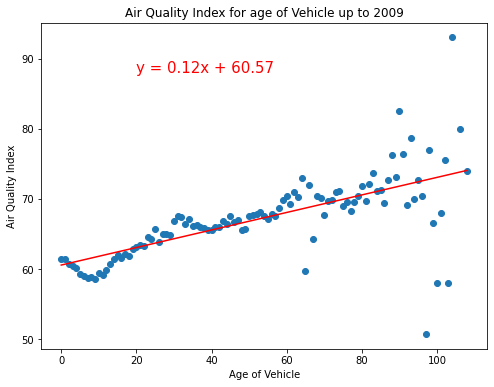

In [25]:
# Plot the scatter plot for 2009
plt.figure(figsize=(8,6))
plt.scatter(veh_age_2009_df['vehicle_age'], veh_age_2009_df['AQI'])

# Plot the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(veh_age_2009_df['vehicle_age'], veh_age_2009_df['AQI'])
regress_values = veh_age_2009_df['vehicle_age'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(veh_age_2009_df['vehicle_age'], regress_values, "r-")
plt.annotate(line_eq,(20,88),fontsize=15,color="red")

# Set the title and axis labels   
plt.title("Air Quality Index for age of Vehicle up to 2009")
plt.xlabel("Age of Vehicle")
plt.ylabel("Air Quality Index")
                                                      
# Calculate the correlation coefficient
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/AQI_veh_age_2009.png",bbox_inches="tight", pad_inches=.3)

plt.show()

The r-squared is: 0.004456678267169855


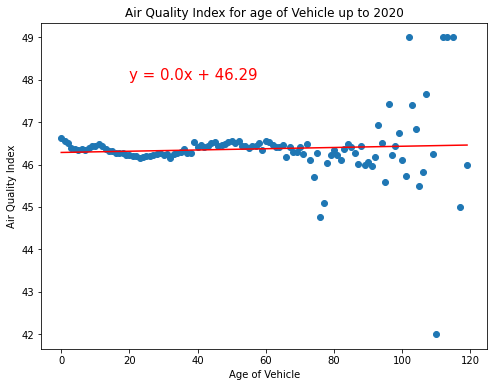

In [26]:
# Plot the scatter plot for 2009
plt.figure(figsize=(8,6))
plt.scatter(veh_age_2020_df['vehicle_age'], veh_age_2020_df['AQI'])

# Plot the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(veh_age_2020_df['vehicle_age'], veh_age_2020_df['AQI'])
regress_values = veh_age_2020_df['vehicle_age'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(veh_age_2020_df['vehicle_age'], regress_values, "r-")
plt.annotate(line_eq,(20,48),fontsize=15,color="red")

# Set the title and axis labels   
plt.title("Air Quality Index for age of Vehicle up to 2020")
plt.xlabel("Age of Vehicle")
plt.ylabel("Air Quality Index")
                                                      
# Calculate the correlation coefficient
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/AQI_veh_age_2020.png",bbox_inches="tight", pad_inches=.3)

plt.show()

The lower quartile is: 63.692888801734554
The upper quartile is: 70.20234315948602
The interquartile range of is: 6.509454357751466
The the median of is: 67.19329388560158 
Values below 53.928707265107356 could be outliers.
Values above 79.96652469611323 could be outliers.


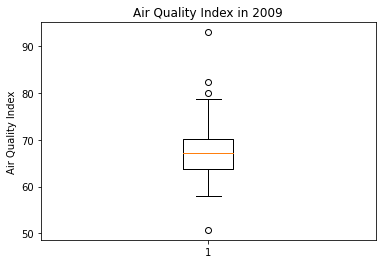

In [9]:
# Calculate quartiles, IQR, and identify potential outliers for 2009
quartiles = veh_age_2009_df['AQI'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range of is: {iqr}")
print(f"The the median of is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Air Quality Index in 2009')
ax1.set_ylabel('Air Quality Index')
ax1.boxplot(veh_age_2009_df['AQI'])
plt.show()


The lower quartile is: 46.2167661114172
The upper quartile is: 46.472359416996724
The interquartile range of is: 0.25559330557952364
The the median of is: 46.35567087971876 
Values below 45.833376153047915 could be outliers.
Values above 46.85574937536601 could be outliers.


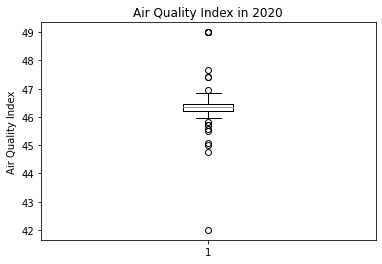

In [27]:
# Calculate quartiles, IQR, and identify potential outliers for 2009
quartiles = veh_age_2020_df['AQI'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range of is: {iqr}")
print(f"The the median of is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Air Quality Index in 2020')
ax1.set_ylabel('Air Quality Index')
ax1.boxplot(veh_age_2020_df['AQI'])
plt.show()


Index(['2DSD', '4DSD', '????', 'BUS ', 'CMIX', 'CONV', 'CUST', 'DCOM', 'DELV',
       'DUMP', 'FIRE', 'FLAT', 'FPM ', 'H/IN', 'H/TR', 'H/WH', 'HRSE', 'LIM ',
       'LOCO', 'LSVT', 'MCC ', 'MCY ', 'P/SH', 'PICK', 'R/RD', 'RBM ', 'RD/S',
       'REFG', 'RPLC', 'S/SP', 'SEDN', 'SEMI', 'SN/P', 'STAK', 'SUBN', 'SWT ',
       'T/CR', 'TANK', 'TAXI', 'TOW ', 'TR/C', 'TRAC', 'TRLR', 'UTIL', 'VAN ',
       'W/DR', 'W/SR'],
      dtype='object', name='body_type')


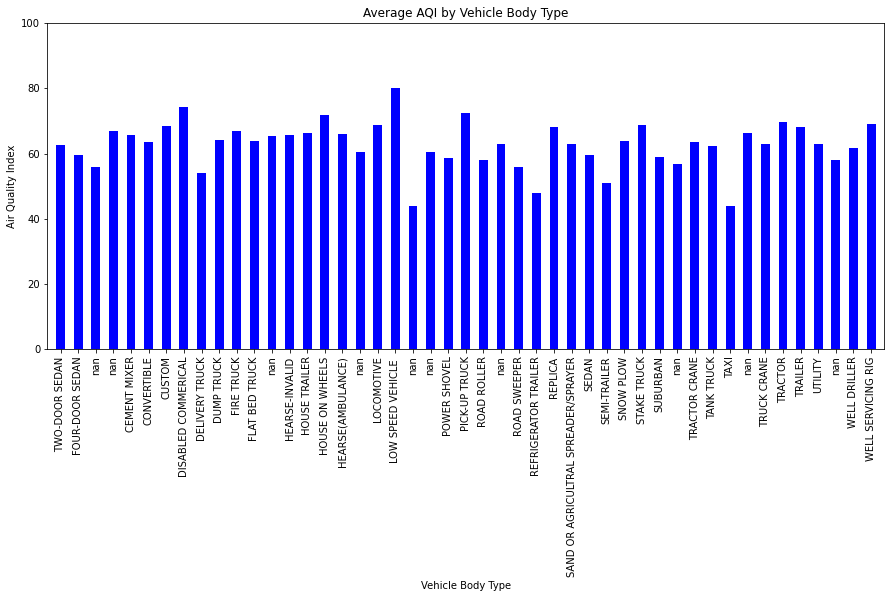

In [15]:
veh_body_type_2009_df = vehicle_aqi_2009_df.groupby("body_type").agg({"AQI":"mean"})

# find the vehicle body types
body_type = veh_body_type_2009_df.index
print(body_type)
veh_body_type_2009_df = veh_body_type_2009_df.reset_index()

# get the body type description
ny_veh_body_type_df = pd.read_csv("ny_veh_body_type.csv")
veh_body_type_2009_df['Body Description'] = veh_body_type_2009_df.set_index(veh_body_type_2009_df['body_type']).index.map(ny_veh_body_type_df.set_index(ny_veh_body_type_df['body_type'])['body_description'])

# Set x axis
body_type_num = np.arange(len(body_type))

# Create the bar graph and set figure size to adjust for space
plt.figure(figsize=(15,6))
plt.bar(body_type_num, veh_body_type_2009_df['AQI'], color="b", align="center", width=.5)

# Create a list indicating where to write x labels
tick_locations = [value for value in body_type_num]
plt.xticks(tick_locations, veh_body_type_2009_df['Body Description'], rotation="vertical")

# Set x and y limits
plt.xlim(-.75, len(veh_body_type_2009_df)-0.25)
plt.ylim(0, veh_body_type_2009_df["AQI"].max()+20)

# Set a Title and labels
plt.title("Average AQI by Vehicle Body Type for 2009")
plt.xlabel("Vehicle Body Type")
plt.ylabel("Air Quality Index")
plt.show()

Index(['2DSD', '4DSD', '????', 'BUS ', 'CMIX', 'CONV', 'CUST', 'DCOM', 'DELV',
       'DUMP', 'FIRE', 'FLAT', 'FPM ', 'H/IN', 'H/TR', 'H/WH', 'HRSE', 'LIM ',
       'LOCO', 'LSVT', 'MCY ', 'P/SH', 'PICK', 'RBM ', 'RD/S', 'REFG', 'RPLC',
       'S/SP', 'SEDN', 'SEMI', 'STAK', 'SUBN', 'SWT ', 'T/CR', 'TANK', 'TAXI',
       'TOW ', 'TR/C', 'TRAC', 'TRLR', 'UTIL', 'VAN ', 'W/DR', 'W/SR'],
      dtype='object', name='body_type')


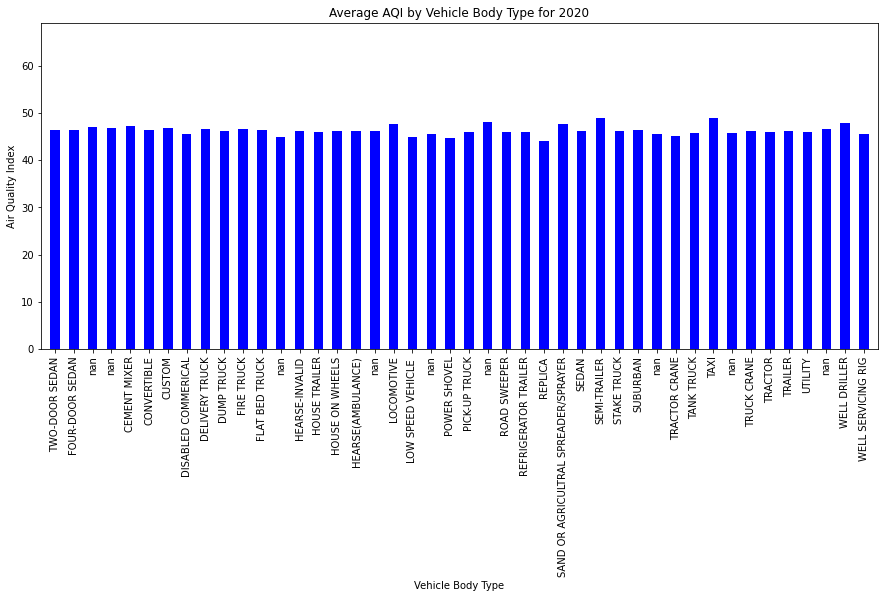

In [29]:
veh_body_type_2020_df = vehicle_aqi_2020_df.groupby("body_type").agg({"AQI":"mean"})

# find the vehicle body types
body_type = veh_body_type_2020_df.index
print(body_type)
veh_body_type_2020_df = veh_body_type_2020_df.reset_index()

veh_body_type_2020_df['Body Description'] = veh_body_type_2020_df.set_index(veh_body_type_2020_df['body_type']).index.map(ny_veh_body_type_df.set_index(ny_veh_body_type_df['body_type'])['body_description'])

# Set x axis
body_type_num = np.arange(len(body_type))

# Create the bar graph and set figure size to adjust for space
plt.figure(figsize=(15,6))
plt.bar(body_type_num, veh_body_type_2020_df['AQI'], color="b", align="center", width=.5)

# Create a list indicating where to write x labels
tick_locations = [value for value in body_type_num]
plt.xticks(tick_locations, veh_body_type_2020_df['Body Description'], rotation="vertical")

# Set x and y limits
plt.xlim(-.75, len(veh_body_type_2020_df)-0.25)
plt.ylim(0, veh_body_type_2020_df["AQI"].max()+20)

# Set a Title and labels
plt.title("Average AQI by Vehicle Body Type for 2020")
plt.xlabel("Vehicle Body Type")
plt.ylabel("Air Quality Index")
plt.show()

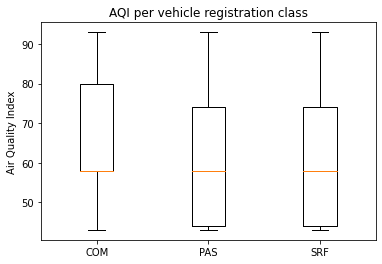

In [16]:
veh_class_2009_group = vehicle_aqi_2009_df.groupby("registration_class")
veh_classes = veh_class_2009_group.groups.keys()

veh_class_AQI = []

for veh_class in veh_classes:
    class_group_df = veh_class_2009_group.get_group(veh_class)
    
    # append to the list the AQI for each vehicle in class
    veh_class_AQI.append(class_group_df['AQI'])


fig1, ax1 = plt.subplots()
ax1.set_title('AQI per vehicle registration class for 2009')
ax1.set_ylabel('Air Quality Index')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='b')
bp = ax1.boxplot(veh_class_AQI)

ax1.set_xticklabels(veh_classes)

#plt.savefig("Images/registration_class_aqi_2009.png",bbox_inches="tight", pad_inches=.3)

plt.show()


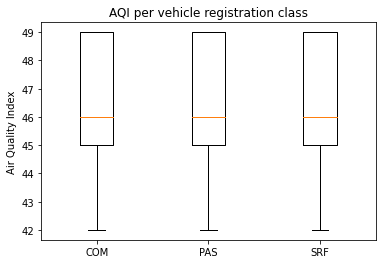

In [30]:
veh_class_2020_group = vehicle_aqi_2020_df.groupby("registration_class")
veh_classes = veh_class_2020_group.groups.keys()

veh_class_AQI = []

for veh_class in veh_classes:
    class_group_df = veh_class_2020_group.get_group(veh_class)
    
    # append to the list the AQI for each vehicle in class
    veh_class_AQI.append(class_group_df['AQI'])


fig1, ax1 = plt.subplots()
ax1.set_title('AQI per vehicle registration class for 2020')
ax1.set_ylabel('Air Quality Index')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='b')
bp = ax1.boxplot(veh_class_AQI)

ax1.set_xticklabels(veh_classes)

#plt.savefig("Images/registration_class_aqi_2020.png",bbox_inches="tight", pad_inches=.3)

plt.show()